In [12]:
import sys
sys.path.append('/mnt/archgen/users/yilei/IBD/timeSampling/ibdDemo')
from analytic import singlePop_2tp, singlePop_2tp_given_vecNe 

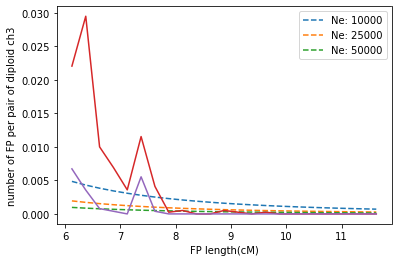

In [30]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os

nsamples = [13, 11]
covs = ['cov2', 'cov3']
bins = np.arange(6,12,0.25)
binmidpoint = (bins[1:]+bins[:-1])/2

for Ne in [10000, 25000, 50000]:
    lambdas = singlePop_2tp(2.232573, binmidpoint/100, 0, Ne)
    lambdas = 4*lambdas*(binmidpoint[1]-binmidpoint[0])/100
    plt.plot(binmidpoint, lambdas, linestyle='--', label=f'Ne: {Ne}')

for cov, nsample in zip(covs, nsamples):
    dfs = []
    for b in np.arange(1,51):
        if os.path.exists(f'./{cov}/batch{b}/ch3.tsv'):
            df = pd.read_csv(f'./{cov}/batch{b}/ch3.tsv', sep='\t')
            dfs.append(df)
    df = pd.concat(dfs)
    FPs = np.array(100*df['lengthM'])
    x, _ = np.histogram(FPs, bins=bins)
    plt.plot(binmidpoint, x/(len(dfs)*(nsample*(nsample-1)/2)))

plt.ylabel('number of FP per pair of diploid ch3')
plt.xlabel('FP length(cM)')
plt.legend(loc='upper right')
plt.savefig('FP.png', dpi=300)